# Import libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy.stats as stats
import math
from geopy.geocoders import Nominatim
import re

# Versiones de librerías
print("".join(f"{x[0]}:{x[1]}\n" for x in [
    ("Pandas",pd.__version__),
    ("Numpy",np.__version__),
    ("Matplotlib",matplotlib.__version__),
    ("SKlearn",sklearn.__version__),
    ("Seaborn",sns.__version__)
]))

Pandas:1.1.3
Numpy:1.19.2
Matplotlib:3.2.0
SKlearn:0.24.2
Seaborn:0.11.0



# Load dataset

In [2]:
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [3]:
# print(df.info())
# df.describe()

In [4]:
# def display_dataset_distributions(dataset,bins=10):
#     fig = dataset.hist(xlabelsize=12, ylabelsize=12,figsize=(22,10),bins=bins)
#     [x.title.set_size(14) for x in fig.ravel()]
#     plt.tight_layout()
#     plt.show()
# display_dataset_distributions(df)

In [5]:
# fig = plt.figure(figsize=(15,5)), sns.distplot(df['Sunshine'])
# fig = plt.figure(figsize=(15,5)), plt.scatter(1/df['Sunshine'],df['Cloud3pm'])
# fig = plt.figure(figsize=(25,5)), df.boxplot()

# Add RainfallTomorrow

In [6]:
df['RainfallTomorrow']=df['Rainfall'].shift(-1)
df['RainfallYesterday']=df['Rainfall'].shift(1)
df['RainYesterday']=df['RainToday'].shift(1)

# Delete the first and the last element of each city
remove_index = []
for l in pd.unique(df['Location']):
    remove_index.append(df.index[df['Location'] == l][0])
    remove_index.append(df.index[df['Location'] == l][-1])

df.drop(df.index[np.array(remove_index)],inplace=True)
df.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,RainfallTomorrow,RainfallYesterday,RainYesterday
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,0.0,0.6,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,0.0,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,1.0,0.0,No


# Split into Train Test

In [7]:
df = df[df['RainTomorrow'].notna()]
# df = df[df['RainfallTomorrow'].notna()]
print(((1-df.count()/df.count().max())*100))

Date                  0.000000
Location              0.000000
MinTemp               0.448260
MaxTemp               0.225889
Rainfall              0.989409
Evaporation          42.780338
Sunshine             47.686570
WindGustDir           6.560642
WindGustSpeed         6.518419
WindDir9am            7.041976
WindDir3pm            2.655079
WindSpeed9am          0.947891
WindSpeed3pm          1.847929
Humidity9am           1.246965
Humidity3pm           2.536857
Pressure9am           9.855389
Pressure3pm           9.831463
Cloud9am             37.735477
Cloud3pm             40.151297
Temp9am               0.635446
Temp3pm               1.915485
RainToday             0.989409
RainTomorrow          0.000000
RainfallTomorrow      0.000000
RainfallYesterday     1.408817
RainYesterday         1.408817
dtype: float64


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['RainTomorrow','RainfallTomorrow'], axis=1),
    df['RainTomorrow'],
    test_size=0.15,
    random_state=0)

print("X_train.shape, X_test.shape = ")
print(X_train.shape, X_test.shape)

print("\ny_train = ")
print(y_train)

X_train.shape, X_test.shape = 
(120789, 24) (21316, 24)

y_train = 
66916     Yes
118862     No
110872    Yes
52439      No
101685     No
         ... 
43232      No
100270     No
98558      No
120958     No
44815      No
Name: RainTomorrow, Length: 120789, dtype: object


# Drop columns

In [9]:
print(((1-df.count()/df.count().max())*100))

Date                  0.000000
Location              0.000000
MinTemp               0.448260
MaxTemp               0.225889
Rainfall              0.989409
Evaporation          42.780338
Sunshine             47.686570
WindGustDir           6.560642
WindGustSpeed         6.518419
WindDir9am            7.041976
WindDir3pm            2.655079
WindSpeed9am          0.947891
WindSpeed3pm          1.847929
Humidity9am           1.246965
Humidity3pm           2.536857
Pressure9am           9.855389
Pressure3pm           9.831463
Cloud9am             37.735477
Cloud3pm             40.151297
Temp9am               0.635446
Temp3pm               1.915485
RainToday             0.989409
RainTomorrow          0.000000
RainfallTomorrow      0.000000
RainfallYesterday     1.408817
RainYesterday         1.408817
dtype: float64


In [10]:
X_train.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)

# Variable Encoding

## Wind Direction

In [11]:
y_train.replace({"No":0,"Yes":1},inplace=True)
X_train.replace({"No":0,"Yes":1},inplace=True)

In [12]:
labels = np.array(pd.unique(df[['WindGustDir', 'WindDir9am', 'WindDir3pm']].values.ravel('K')),dtype=np.str)
labels = np.delete(labels, np.argwhere(labels=='nan'))
print(labels)

['WNW' 'WSW' 'NE' 'W' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']


![cardenal_points](./cardenal_points.png)

In [13]:
# def wind_dir_circular_representation(dir):
#     return np.cos(2 * np.pi * (dir/16)), np.sin(2 * np.pi * (dir/16))

windDirDic = {
    "E": 0,
    "ENE": 1,
    "NE": 2,
    "NNE": 3,
    "N": 4,
    "NNW": 5,
    "NW": 6,
    "WNW": 7,
    "W": 8,
    "WSW": 9,
    "SW": 10,
    "SSW": 11,
    "S": 12,
    "SSE": 13,
    "SE": 14,
    "ESE": 15,
}

X_train.replace(windDirDic,inplace=True)

wind_dir_colums = ['WindGustDir','WindDir9am','WindDir3pm']
for wd in wind_dir_colums:
    X_train[wd+'_cos'] = np.cos(2 * np.pi * (X_train[wd]/16))
    X_train[wd+'_sin'] = np.sin(2 * np.pi * (X_train[wd]/16))

X_train.drop(wind_dir_colums,axis=1, inplace=True)
X_train.head(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,Temp3pm,RainToday,RainfallYesterday,RainYesterday,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin
66916,2016-09-15,MelbourneAirport,6.7,14.2,3.2,57.0,24.0,39.0,80.0,70.0,...,13.0,1.0,20.4,1.0,-0.92388,-3.826834e-01,-1.000000e+00,1.224647e-16,-0.923880,-0.382683
118862,2012-06-17,PerthAirport,12.7,20.7,3.0,24.0,9.0,13.0,90.0,54.0,...,19.9,1.0,1.4,1.0,-1.00000,1.224647e-16,6.123234e-17,1.000000e+00,-0.707107,0.707107
110872,2015-06-18,Albany,12.5,16.1,0.2,NaN,30.0,19.0,73.0,76.0,...,15.0,0.0,0.0,0.0,NaN,NaN,1.000000e+00,0.000000e+00,0.923880,0.382683


## Location

In [14]:
def get_name_with_space(loc):
    return re.sub(r'([a-z](?=[A-Z])|[A-Z](?=[A-Z][a-z]))', r'\1 ', loc)

In [15]:
locations = np.array(X_train['Location'].unique(),dtype=np.str)
locations = [get_name_with_space(loc) for loc in locations]

locations_coord = []
geocoder = Nominatim(user_agent = '_')
for loc in locations:
    location = geocoder.geocode(loc+' Australia')
    if location:
        lon=location.longitude
        lat=location.latitude
        locations_coord.append({"name":loc,"lon":lon,"lat":lat})
    else:
         raise Exception('no coordinates could be found for '+str(loc))

locations_df = pd.DataFrame.from_dict(locations_coord)

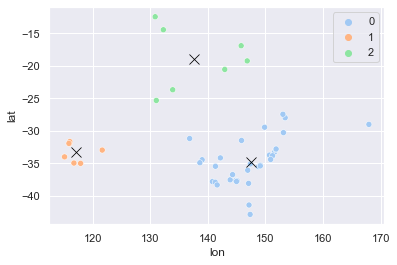

In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import haversine_distances
X = locations_df.drop(['name'],axis=1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
cluster = kmeans.labels_
fig = plt.figure()
sns.scatterplot(x='lon',y='lat',data=locations_df,hue=cluster,palette='pastel')
sns.scatterplot(x=kmeans.cluster_centers_[:,0],y=kmeans.cluster_centers_[:,1],marker="x",s=100,color="0")

In [17]:
locations_df["type"] = cluster
locations_df

,name,lon,lat,type
0,Melbourne Airport,144.833481,-37.667111,0
1,Perth Airport,115.967608,-31.940610,1
2,Albany,117.883608,-35.024782,1
3,Mount Ginini,148.772635,-35.529720,0
4,Mount Gambier,140.782007,-37.824670,0
5,Sale,147.064790,-38.105036,0
6,Moree,149.840715,-29.461720,0
7,Ballarat,143.860565,-37.562303,0
8,Pearce RAAF,116.017544,-31.673960,1
9,Cobar,145.834444,-31.498333,0


In [18]:
X_train['LocationType'] = X_train.apply(
    lambda row: int(locations_df.loc[locations_df['name'] == get_name_with_space(row['Location'])].filter(['type']).values[0]), 
    axis=1)
    
print("Unique values in LocationType = "+str(pd.unique(X_train['LocationType'])))

Unique values in LocationType = [0 1 2]


In [19]:
y = X_train.LocationType.values
onehotencoder = OneHotEncoder(categories='auto',sparse=False)
y = onehotencoder.fit_transform(y.reshape(-1,1))
for i in range(y.shape[1]-1):
    X_train['LocationType_'+str(i)]=y[:,i]

X_train.drop(['Location','LocationType'], axis=1, inplace=True)
X_train.head()

,Date,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,...,RainfallYesterday,RainYesterday,WindGustDir_cos,WindGustDir_sin,WindDir9am_cos,WindDir9am_sin,WindDir3pm_cos,WindDir3pm_sin,LocationType_0,LocationType_1
66916,2016-09-15,6.7,14.2,3.2,57.0,24.0,39.0,80.0,70.0,1007.0,...,20.4,1.0,-0.923880,-3.826834e-01,-1.000000e+00,1.224647e-16,-0.923880,-0.382683,1.0,0.0
118862,2012-06-17,12.7,20.7,3.0,24.0,9.0,13.0,90.0,54.0,1026.2,...,1.4,1.0,-1.000000,1.224647e-16,6.123234e-17,1.000000e+00,-0.707107,0.707107,0.0,1.0
110872,2015-06-18,12.5,16.1,0.2,NaN,30.0,19.0,73.0,76.0,1017.4,...,0.0,0.0,NaN,NaN,1.000000e+00,0.000000e+00,0.923880,0.382683,0.0,1.0
52439,2009-12-13,6.2,21.5,0.0,39.0,17.0,19.0,48.0,30.0,NaN,...,NaN,NaN,-1.000000,1.224647e-16,-9.238795e-01,-3.826834e-01,-0.707107,-0.707107,1.0,0.0
101685,2015-02-09,8.7,24.2,0.0,39.0,20.0,20.0,56.0,41.0,1026.2,...,0.0,0.0,0.707107,-7.071068e-01,7.071068e-01,-7.071068e-01,-0.382683,-0.923880,1.0,0.0


# Feature Selection / New Features

In [55]:
X_train.drop('Date',axis=1,inplace=True)

(<matplotlib.axes._subplots.AxesSubplot at 0x1142e684bb0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1142e684bb0>)

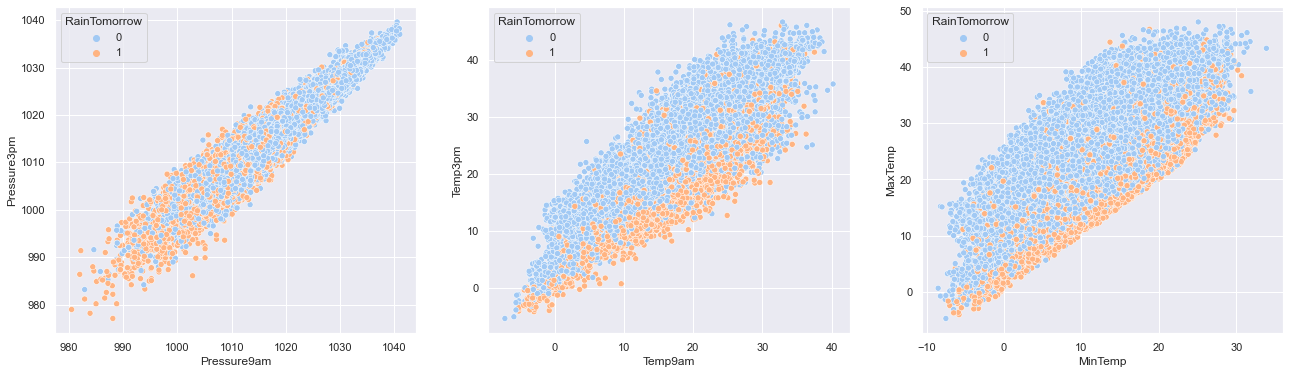

In [20]:
fig, axs = plt.subplots(1, 3,figsize=(22,6))

plt.subplot(1,3,1), sns.scatterplot(x='Pressure9am',y='Pressure3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,2), sns.scatterplot(x='Temp9am',y='Temp3pm',hue=y_train,palette='pastel',data=X_train)
plt.subplot(1,3,3), sns.scatterplot(x='MinTemp',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)

In [21]:
# Pressures
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Pressure3pm.fillna(X_train.Pressure9am, inplace=True)
X_train.Pressure9am.fillna(X_train.Pressure3pm, inplace=True)
press_mean = (X_train['Pressure3pm'] + X_train['Pressure9am'])/2
X_train['PressureMean'] = press_mean
X_train.drop('Pressure3pm', inplace=True, axis=1)
X_train.drop('Pressure9am', inplace=True, axis=1)

# Temperatures
temp_diff = X_train['Temp3pm'] - X_train['Temp9am']
X_train['TempDiff'] = temp_diff
# Mean of colums. When one of the columns is NaN, the mean takes the value of the other column
X_train.Temp3pm.fillna(X_train.Temp9am, inplace=True)
X_train.Temp9am.fillna(X_train.Temp3pm, inplace=True)
temp_mean = (X_train['Temp3pm'] + X_train['Temp9am'])/2
X_train['TempMean'] = temp_mean
X_train.drop('Temp3pm', inplace=True, axis=1)
X_train.drop('Temp9am', inplace=True, axis=1)

# Temperatures max-min
max_temp_diff = X_train['MaxTemp'] - X_train['MinTemp']
X_train['TempMaxDiff'] = max_temp_diff
X_train.drop('MinTemp', inplace=True, axis=1)

Percentage of NaN:
Date                 0.000000
MaxTemp              0.227670
Rainfall             1.001747
WindGustSpeed        6.509699
WindSpeed9am         0.937999
WindSpeed3pm         1.837088
Humidity9am          1.227761
Humidity3pm          2.519269
RainToday            1.001747
RainfallYesterday    1.428110
RainYesterday        1.428110
WindGustDir_cos      6.552749
WindGustDir_sin      6.552749
WindDir9am_cos       7.043688
WindDir9am_sin       7.043688
WindDir3pm_cos       2.629379
WindDir3pm_sin       2.629379
LocationType_0       0.000000
LocationType_1       0.000000
PressureMean         9.697903
TempDiff             2.274214
TempMean             0.234293
TempMaxDiff          0.601048
dtype: float64


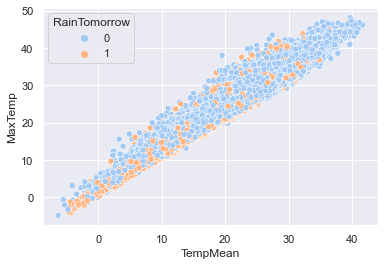

In [22]:
sns.scatterplot(x='TempMean',y='MaxTemp',hue=y_train,palette='pastel',data=X_train)
print("Percentage of NaN:")
print(((1-X_train.count()/X_train.count().max())*100))

In [26]:
X_train.drop('MaxTemp', inplace=True, axis=1)
X_train.head()

KeyError: "['MaxTemp'] not found in axis"

(<matplotlib.axes._subplots.AxesSubplot at 0x1142e709730>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1142e709730>)

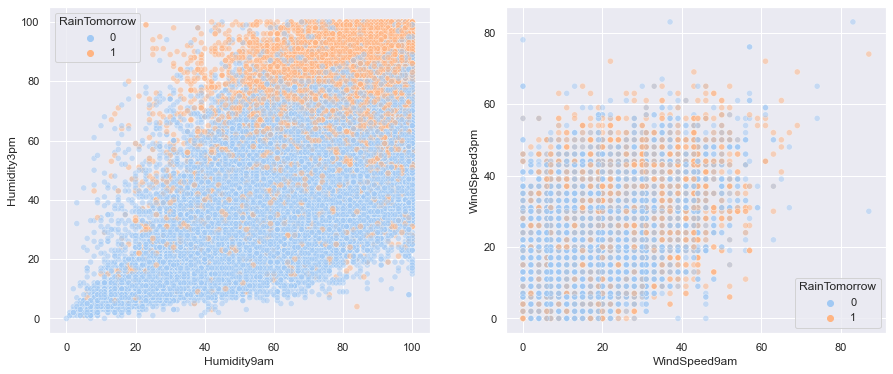

In [27]:
fig, axs = plt.subplots(1, 3,figsize=(15,6))

plt.subplot(1,2,1), sns.scatterplot(x='Humidity9am',y='Humidity3pm',hue=y_train,palette='pastel',alpha = .5, data=X_train)
plt.subplot(1,2,2), sns.scatterplot(x='WindSpeed9am',y='WindSpeed3pm',hue=y_train,palette='pastel',alpha = .5,data=X_train)

In [28]:
# '''*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
# *-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*'''
# ''' Check if that makes sense '''
# hum_diff = df['Humidity3pm'] - df['Humidity9am']
# hum_mean = (df['Humidity3pm'] + df['Humidity9am'])/2
# df['HumidityDiff'] = hum_diff
# df['HumidityMean'] = hum_mean

# windSpeed_diff = df['WindSpeed3pm'] - df['WindSpeed9am']
# windSpeed_mean = (df['WindSpeed3pm'] + df['WindSpeed9am'])/2
# df['WindSpeedDiff'] = windSpeed_diff
# df['WindSpeedMean'] = windSpeed_mean

# X_train.drop('Humidity3pm', inplace=True, axis=1)
# X_train.drop('Humidity9am', inplace=True, axis=1)
# X_train.drop('WindSpeed3pm', inplace=True, axis=1)
# X_train.drop('WindSpeed9am', inplace=True, axis=1)
# ''' Check if that makes sense '''


# X_train.head()

# Outliers

In [29]:
def outlier_diagnostic_plots(df, variable):
    fig,axes = plt.subplots(1,3,figsize=(20,4))

    # histograma
    sns.histplot(df[variable], bins=30,ax=axes[0], kde=True)
    axes[0].set_title('Histograma')
    
    # qqplot    
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    axes[1].set_title('QQ')
    
    # boxplot    
    sns.boxplot(y=df[variable],ax=axes[2])
    axes[2].set_title('Box&Whiskers')

    fig.suptitle(variable, fontsize=16)
    
def find_skewed_boundaries(df, variable, distance=1.5):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

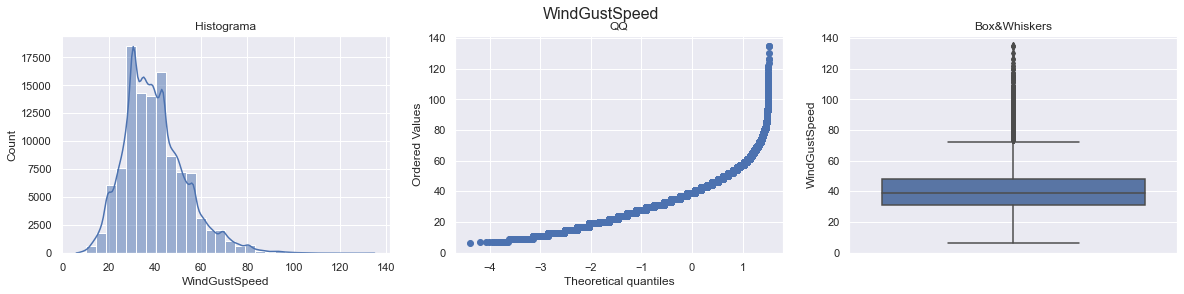

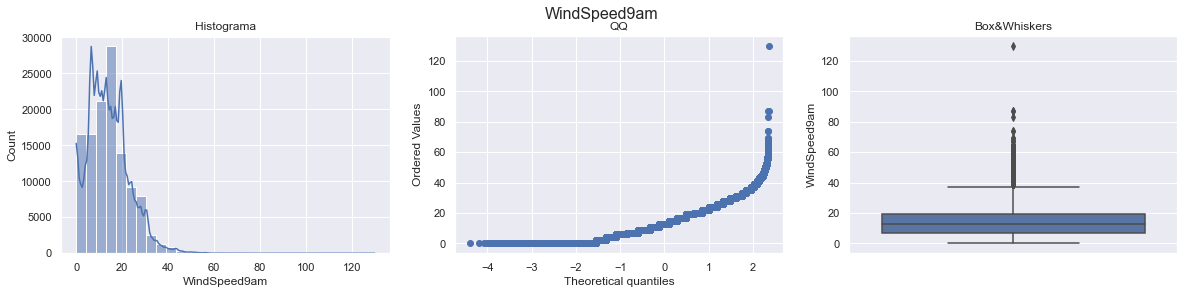

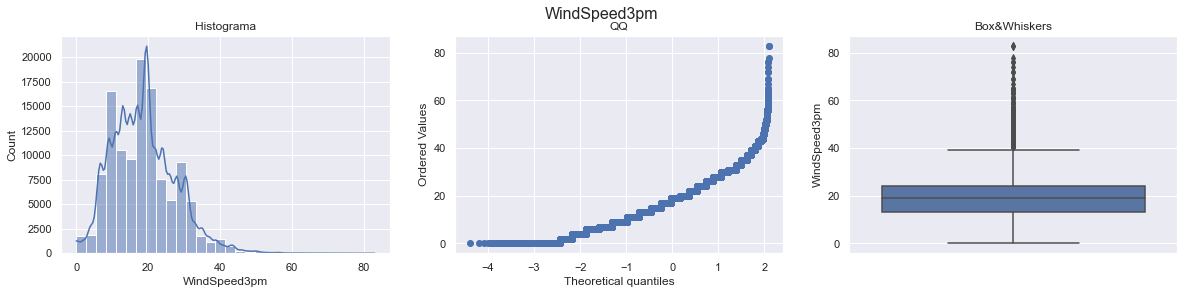

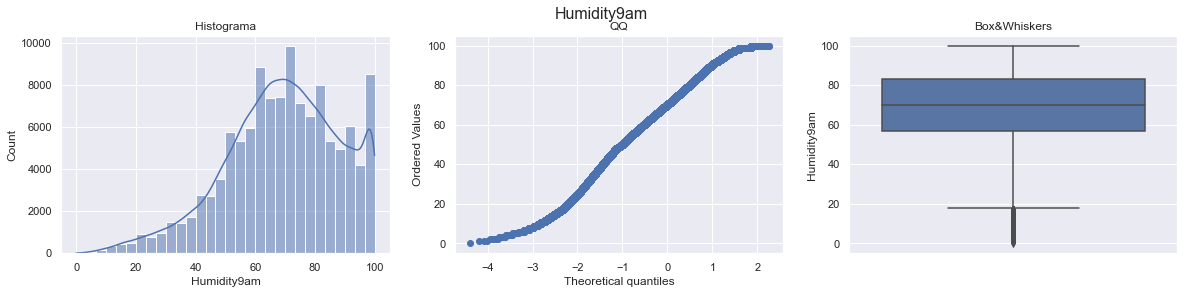

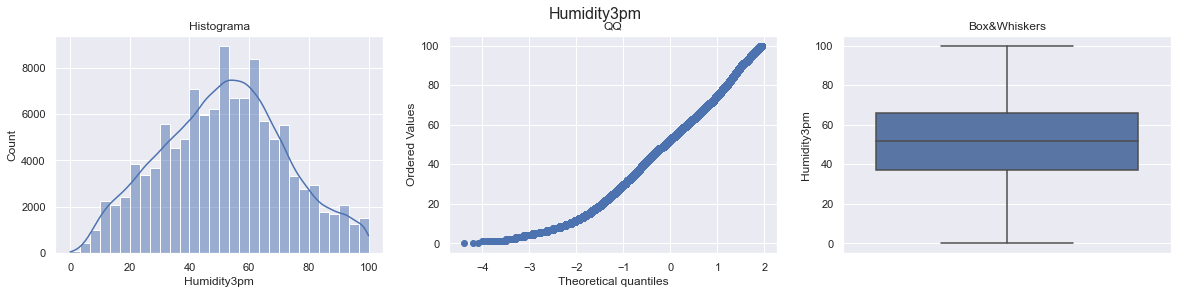

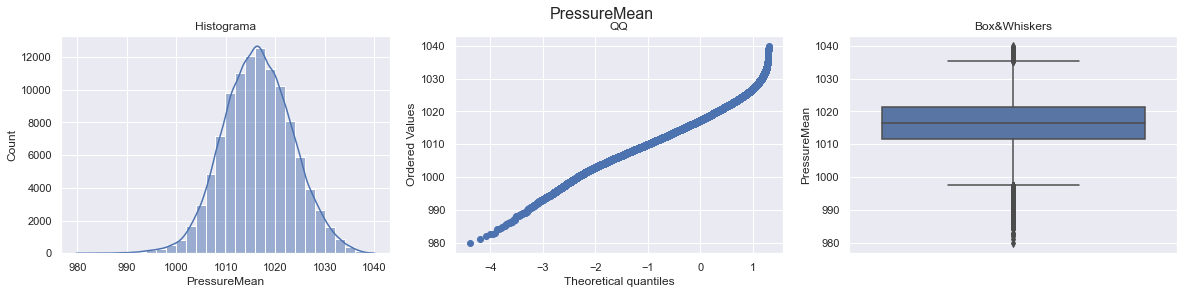

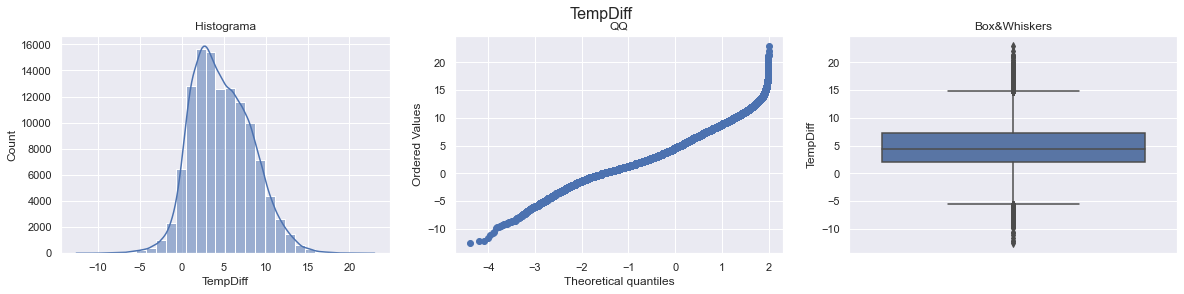

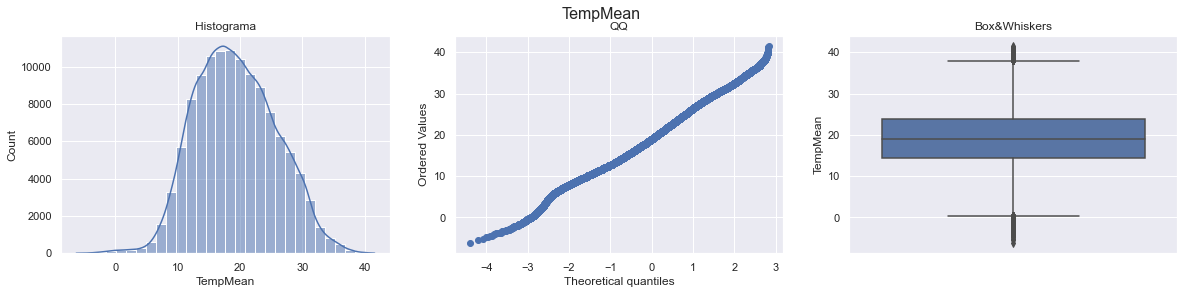

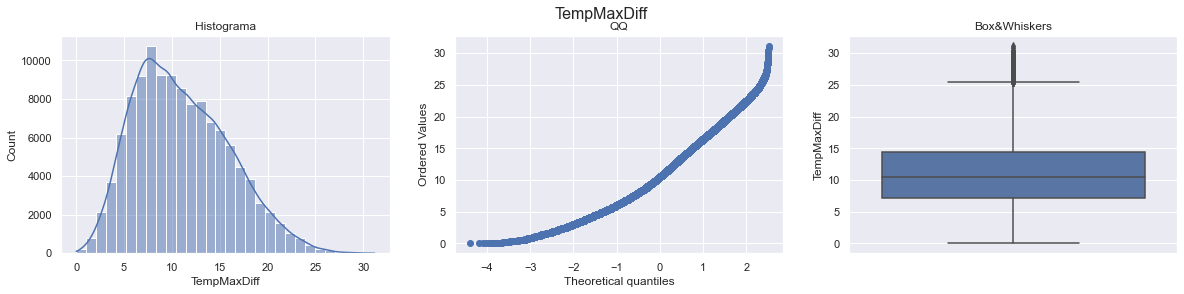

In [30]:
cloumns_plot = [
    # 'Rainfall',
    'WindGustSpeed',
    'WindSpeed9am',
    'WindSpeed3pm',
    'Humidity9am',
    'Humidity3pm',
    # 'RainfallYesterday',
    'PressureMean',
    'TempDiff',
    'TempMean',
    'TempMaxDiff'
    ]

for col in cloumns_plot:
    outlier_diagnostic_plots(X_train, col)

In [31]:
# Trim outlier
# outliers_total = np.array(np.repeat(False,X_train.shape[0]))
# for col in cloumns_plot:
    
#     upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 2.)
#     outliers = np.where(X_train[col] > upper_limit, True,
#                         np.where(X_train[col] < lower_limit, True, False))                        
#     outliers_total = np.logical_or(outliers_total, outliers)
    
#     print(str(col) + " outliers = "+str(outliers.sum()))

# print("Total outliers = "+str(outliers_total.sum()))

# X_train_trimmed = X_train.loc[~(outliers_total)]
# for col in cloumns_plot:
#     outlier_diagnostic_plots(X_train_trimmed, col)

# Capping outlier

# X_train_capped = X_train.copy()
# for col in cloumns_plot:
    
#     upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 1.5)
#     X_train_capped[col] = np.where(X_train[col] > upper_limit, upper_limit,
#                           np.where(X_train[col] < lower_limit, lower_limit, X_train_capped[col]))

# for col in cloumns_plot:
#     outlier_diagnostic_plots(X_train_capped, col)


WindGustSpeed outliers = 1434
WindSpeed9am outliers = 1127
WindSpeed3pm outliers = 1080
Humidity9am outliers = 294
Humidity3pm outliers = 0
PressureMean outliers = 286
TempDiff outliers = 265
TempMean outliers = 53
TempMaxDiff outliers = 81
Total outliers = 3644


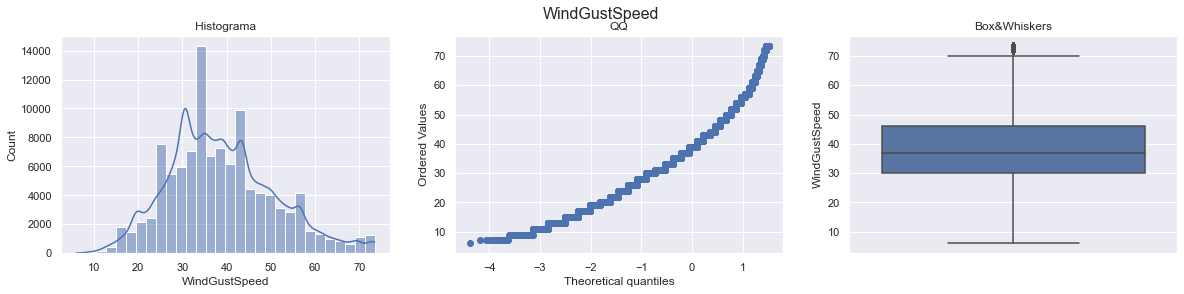

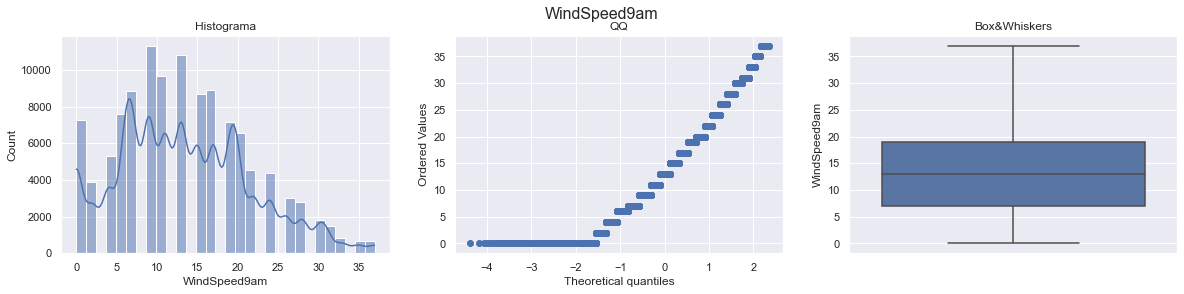

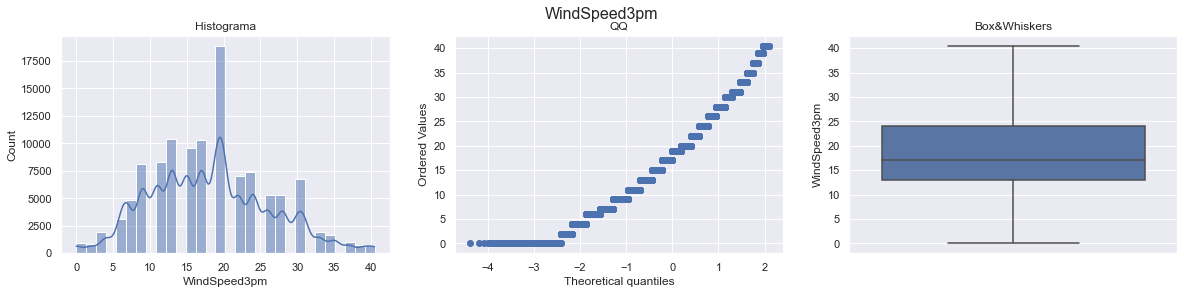

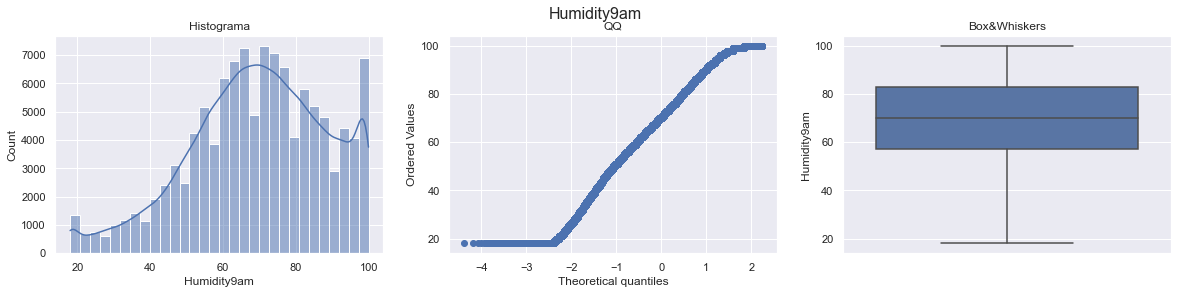

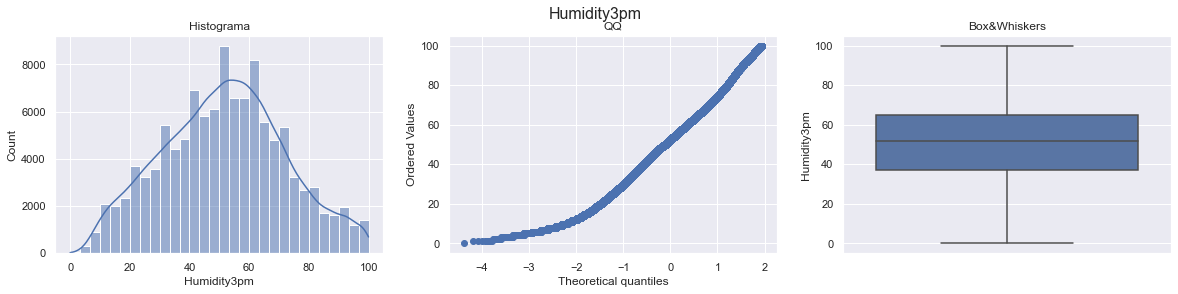

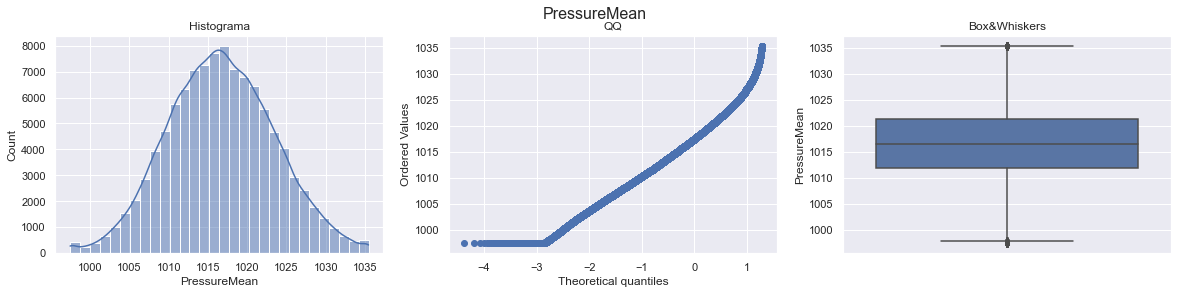

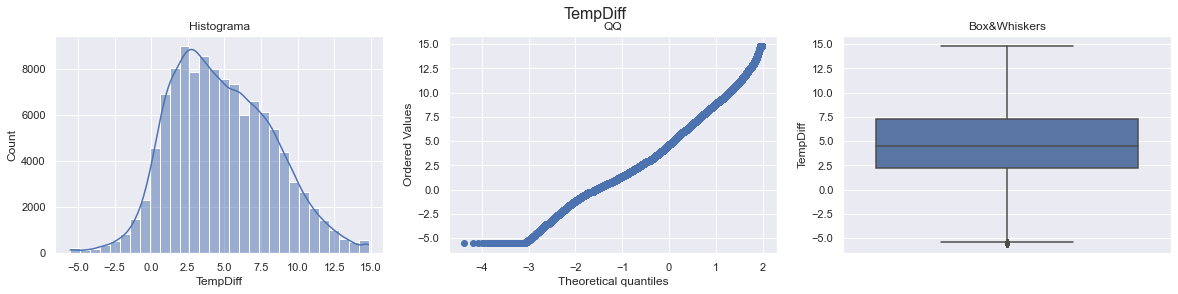

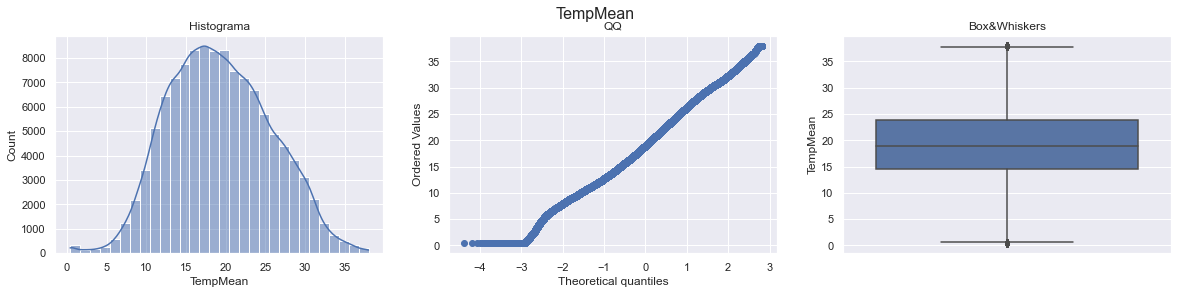

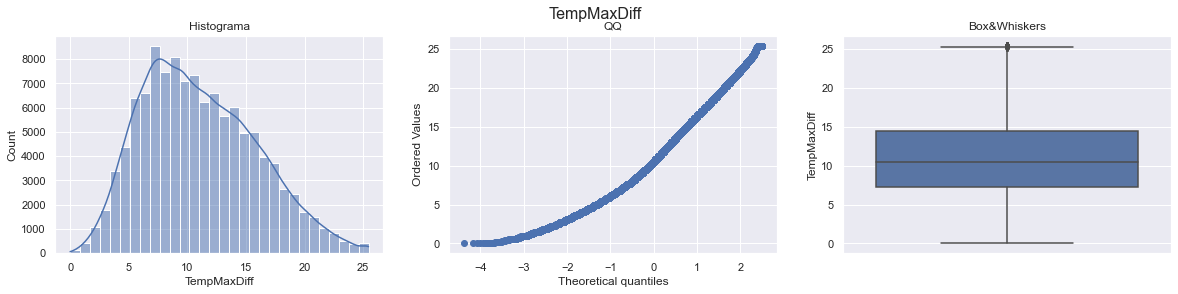

In [32]:
# Trimming and capping outliers
outliers_total = np.array(np.repeat(False,X_train.shape[0]))
X_train_capped = X_train.copy()
for col in cloumns_plot:
    
    upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 1.8)
    outliers = np.where(X_train[col] > upper_limit, True,
                        np.where(X_train[col] < lower_limit, True, False))                        
    outliers_total = np.logical_or(outliers_total, outliers)
    
    print(str(col) + " outliers = "+str(outliers.sum()))

    upper_limit, lower_limit = find_skewed_boundaries(X_train, col, 1.5)
    X_train_capped[col] = np.where(X_train[col] > upper_limit, upper_limit,
                          np.where(X_train[col] < lower_limit, lower_limit, X_train_capped[col]))

print("Total outliers = "+str(outliers_total.sum()))

X_train_trimmed = X_train_capped.loc[~(outliers_total)]
for col in cloumns_plot:
    outlier_diagnostic_plots(X_train_trimmed, col)

# Correlation

In [30]:
# fig = plt.figure(figsize=(15,10))
# sns.heatmap(X_train.corr())

In [31]:
# sns.pairplot(df)

# Imputation

In [56]:
df_train = X_train
df_train['RainTomorrow']=y_train

df_test = X_test
df_test['RainTomorrow']=y_test

In [57]:
print("Percentage of NaN:")
print(((1-X_train.count()/X_train.count().max())*100))

Percentage of NaN:
Rainfall             1.001747
WindGustSpeed        6.509699
WindSpeed9am         0.937999
WindSpeed3pm         1.837088
Humidity9am          1.227761
Humidity3pm          2.519269
RainToday            1.001747
RainfallYesterday    1.428110
RainYesterday        1.428110
WindGustDir_cos      6.552749
WindGustDir_sin      6.552749
WindDir9am_cos       7.043688
WindDir9am_sin       7.043688
WindDir3pm_cos       2.629379
WindDir3pm_sin       2.629379
LocationType_0       0.000000
LocationType_1       0.000000
PressureMean         9.697903
TempDiff             2.274214
TempMean             0.234293
TempMaxDiff          0.601048
RainTomorrow         0.000000
dtype: float64


In [58]:
# from sklearn.feature_selection import mutual_info_classif
# from sklearn.feature_selection import SelectKBest

# def select_features_mi(X_train, y_train, k= 'all'):  
#   fs = SelectKBest(score_func=mutual_info_classif, k=k )  
#   fs.fit(X_train, y_train)  
#   X_train_fs = fs.transform(X_train)  
#   return X_train_fs, fs


In [63]:
# sub_df_train = df_train
# sub_df_train = df_train.dropna()

# X_train_mi, mi = select_features_mi(sub_df_train.drop(['RainTomorrow'],axis=1), sub_df_train['RainTomorrow'])
# plt.figure(figsize=(25,10))
# sns.barplot( x =sub_df_train.columns[:-1].values, y = mi.scores_);

In [ ]:
# fig = plt.figure(figsize=(15,10))
# sns.heatmap(X_train.corr())

# Normalization

In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import QuantileTransformer


# Imputación y codificación
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [ ]:

from sklearn.compose import ColumnTransformer

numeric_features = [df['Rainfall'], df['Sunshine']]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])
	
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numeric_features),
#         ('cat', categorical_transformer, categorical_features)])
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)])

model = Pipeline(steps=[('preprocessor', preprocessor)])

In [ ]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  [0         0.6
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: Rainfall, Length: 145460, dtype: float64,
                                                   0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
          ..
145455   NaN
145456   NaN
145457   NaN
145458   NaN
145459   NaN
Name: Sunshine, Length: 145460, dtype: float64])]))])

In [ ]:
numerics_datetypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_features = X_train.select_dtypes(include=numerics_datetypes).columns
df[numeric_features].head(1)

,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,RainTomorrow,PressureDiff,PressureMean,TempDiff,TempMaxDiff,HumidityDiff,HumidityMean,WindSpeedDiff,WindSpeedMean,CloudDiff,CloudMean
0,22.9,0.6,NaN,NaN,44.0,0.0,-0.6,1007.4,4.9,9.5,-49.0,46.5,4.0,22.0,NaN,NaN


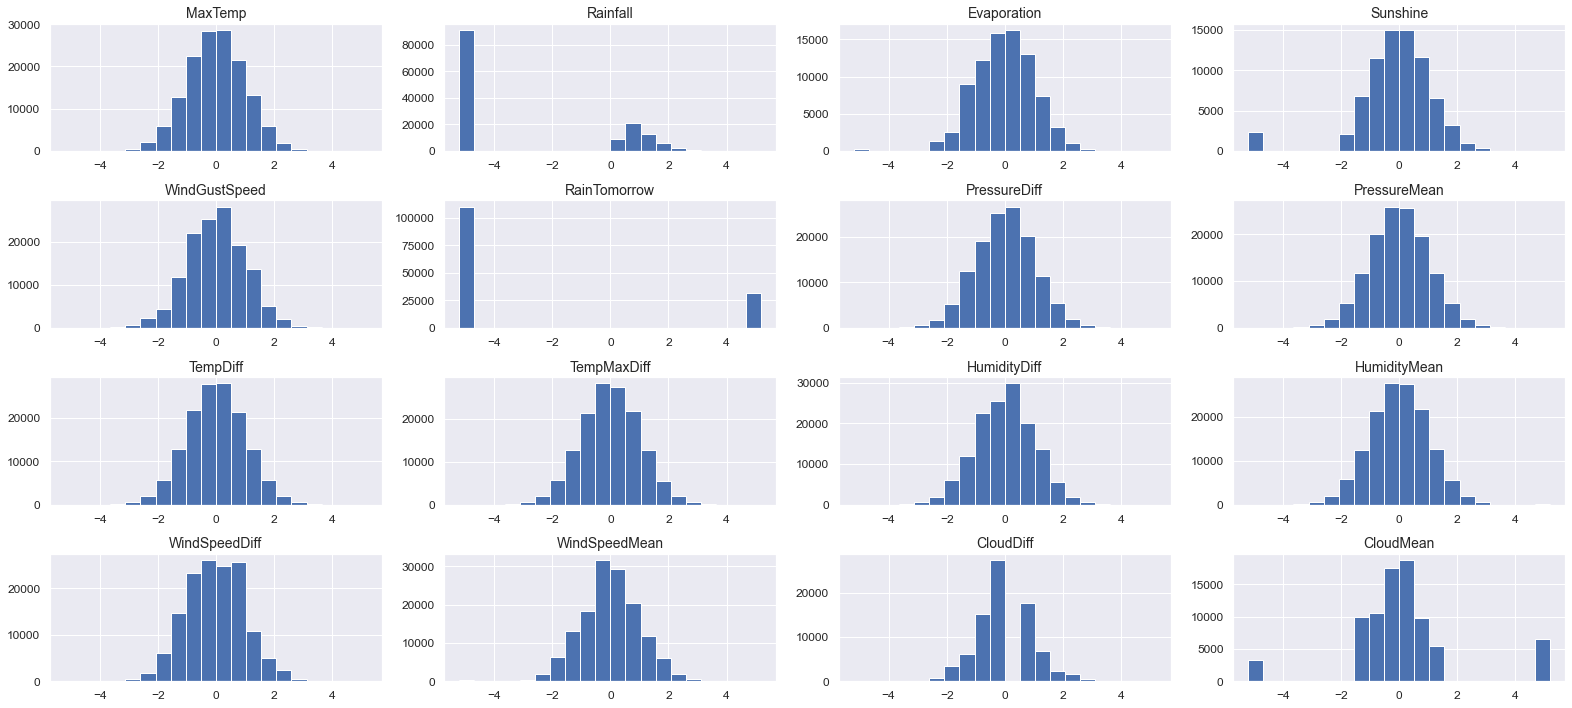

In [ ]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import Pipeline 

# Distribución transformada    
pipeline = Pipeline(
    steps=[
    ( 'qt' , QuantileTransformer(output_distribution= 'normal'))
])
df_transformed_numeric= pipeline.fit_transform(df[numeric_features])
df_transformed = pd.DataFrame(df_transformed_numeric,columns=numeric_features)
df_transformed.head()
display_dataset_distributions(df_transformed,bins=20)